In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [3]:
data = ascii.read('ch16file.txt',header_start = 0, data_start = 2)
Lsun = 3.8418e33
Rsun = 6.9598e10
data

M/Msun,R/Rsun,T,Rho,P,L/Lsun,X,Y(He4),He3,C12,N14,O16
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5e-07,0.00172,15480000.0,150.5,2.338e+17,0.0,0.36462,0.62028,8.9e-06,7.79e-06,0.00373,0.00606
6e-07,0.00182,15480000.0,150.5,2.338e+17,1e-05,0.36463,0.62027,8.9e-06,7.79e-06,0.00373,0.00606
7e-07,0.00191,15470000.0,150.5,2.338e+17,1e-05,0.36464,0.62026,8.9e-06,7.79e-06,0.00373,0.00606
9e-07,0.002,15470000.0,150.4,2.338e+17,1e-05,0.36464,0.62025,8.9e-06,7.79e-06,0.00373,0.00606
1e-06,0.00208,15470000.0,150.4,2.338e+17,1e-05,0.36465,0.62025,8.9e-06,7.79e-06,0.00373,0.00606
1.1e-06,0.00215,15470000.0,150.4,2.338e+17,1e-05,0.36466,0.62024,8.9e-06,7.79e-06,0.00373,0.00606
1.2e-06,0.00222,15470000.0,150.4,2.338e+17,1e-05,0.36466,0.62023,8.9e-06,7.79e-06,0.00373,0.00606
1.3e-06,0.00228,15470000.0,150.4,2.338e+17,1e-05,0.36467,0.62022,8.9e-06,7.79e-06,0.00373,0.00606
1.4e-06,0.00235,15470000.0,150.4,2.338e+17,1e-05,0.36468,0.62021,8.9e-06,7.79e-06,0.00373,0.00606


# a) 

To compute and plot average particle mass, we will use equation 16.15 from the textbook:
$$P_{gas} = \frac{\rho}{\bar m}kT$$
which when solving for average particle mass becomes:
$$\bar m = \frac{\rho}{P}kT$$

We are given pressure in units of dynes/cm^2, so that has to be converted to SI units of kg/(m*s^2):
1 dyn/cm^2 = .1 kg/(m*s^2)

We are given density in units of g/cm^3, which needs to be converted to kg/m^3, by multiplying by 1000

We will also divide by the mass of a proton (1.6726219x10^-27kg)


In [4]:
dens = data['Rho']*1000
P = data['P']/10
k = 1.381e-23
T = data['T']
mp = 1.6726219e-27

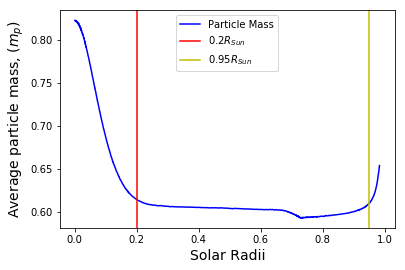

In [5]:
mbar = dens/P*k*T/mp
Rrsun = data['R/Rsun']
plt.plot(Rrsun,mbar,'b-',label = 'Particle Mass')
plt.ylabel('Average particle mass, ($m_p$)',fontsize = 14)
plt.xlabel('Solar Radii', fontsize = 14)
plt.axvline(.2,color = 'r', label = '$0.2R_{Sun}$')
plt.axvline(.95,color = 'y', label = '$0.95R_{Sun}$')
plt.legend()

# Follow-up a)

The inner 20% is where fusion happens, allowing for the largest mass particles. Between 20% and 95%, the radiation zone exists, and in the outer 5% convection happens. At 0.5 solar radii, we calculated to average mass to be about 0.5 proton masses. The calculations above 

# b)
From the book: 
$$|{\frac{dT}{dr}}| = \frac{T_{r_{(i+1)}}-T_{(r_i)}}{r_{i+1}-r_i}$$ 
and:
$$\frac{\gamma-1}{\gamma}\frac{\bar m}{k}g$$

where $g = GM(r)/r^2$ and $\gamma = 5/3$

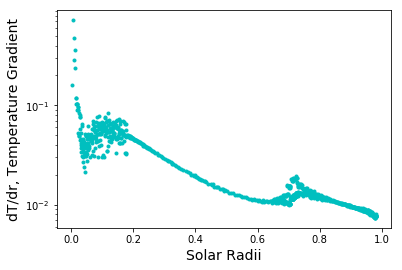

In [23]:
Ti = T[1:]-T[0:1282] #manually "looping" should do the same as creating a for loop
ri = Rrsun[1:]-Rrsun[0:1282]
dtdr = np.abs(Ti/ri)
#Flag = (dtdr>0) & (thing>0)  
plt.plot(Rrsun[0:1282],dtdr,'c.')
ax = plt.gca()
ax.set_yscale('log')
plt.ylabel('dT/dr, Temperature Gradient',fontsize = 14)
plt.xlabel('Solar Radii',fontsize = 14)

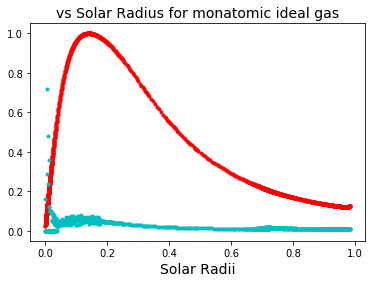

In [38]:
M = data['M/Msun']*1.99e30
gamma = 5/3
G = 6.67e-11
g = G*M/(Rrsun*6.96e8)**2
thing = (gamma-1)/gamma*mbar/k*g/max(thing)
plt.plot(Rrsun,thing, 'r.')
plt.plot(Rrsun[0:1282],dtdr,'c.')
plt.title('vs Solar Radius for monatomic ideal gas',fontsize = 14)
plt.xlabel('Solar Radii',fontsize = 14)